In [1]:
import cv2

def extract_frames(video_path, output_path, frame_interval=1):
    # Open the video file
    video = cv2.VideoCapture(video_path)

    # Initialize variables
    frame_count = 0
    success = True

    while success:
        # Read the next frame from the video
        success, frame = video.read()

        # Check if the frame was read successfully
        if success:
            # Save the frame to an image file
            if frame_count % frame_interval == 0:
                output_file = f"{output_path}/frame_{frame_count}.jpg"
                cv2.imwrite(output_file, frame)

            frame_count += 1

    # Release the video object
    video.release()



Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [5]:
import numpy as np

def calculate_euclidean_distance(frame1, frame2):
    # Convert frames to numpy arrays
    frame1_array = np.array(frame1)
    frame2_array = np.array(frame2)

    # Calculate the Euclidean distance
    distance = np.linalg.norm(frame1_array - frame2_array)

    return distance

def calculate_distances(frames):
    frame1 = frames[0]
    distances = []

    for i in range(1, len(frames)):
        distance = calculate_euclidean_distance(frame1, frames[i])
        distances.append(distance)

    return distances



In [9]:
# Example usage with 10 frames
video_path = 'V_1.mp4'
output_path = 'output'
frame_interval = 10  # Extract every 10th frame (optional)
extract_frames(video_path, output_path, frame_interval)

In [14]:
import os

def load_frames_from_directory(directory):
    frames = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Read the image file
            image_path = os.path.join(directory, filename)
            frame = cv2.imread(image_path)
            frames.append(frame)
    return frames


In [18]:

# Example usage
directory = 'output'

frames = load_frames_from_directory(directory)
print(f"Loaded {len(frames)} frames from the directory.")

Loaded 10 frames from the directory.


In [19]:
import matplotlib.pyplot as plt

# Calculate distances from frame 1 to other frames
distances = calculate_distances(frames)

print("Distances from frame 1 to other frames:")
for i, distance in enumerate(distances):
    frame_number = i + 2  # Adjust frame number to match original frame index
    print(f"Distance from frame 1 to frame {frame_number}: {distance}")
    

Distances from frame 1 to other frames:
Distance from frame 1 to frame 2: 332132.3087671538
Distance from frame 1 to frame 3: 305195.6540467115
Distance from frame 1 to frame 4: 306866.88611024816
Distance from frame 1 to frame 5: 316074.21102646133
Distance from frame 1 to frame 6: 308199.0603489894
Distance from frame 1 to frame 7: 334162.15798620885
Distance from frame 1 to frame 8: 221405.5089829519
Distance from frame 1 to frame 9: 310057.55325261794
Distance from frame 1 to frame 10: 336429.6486964251


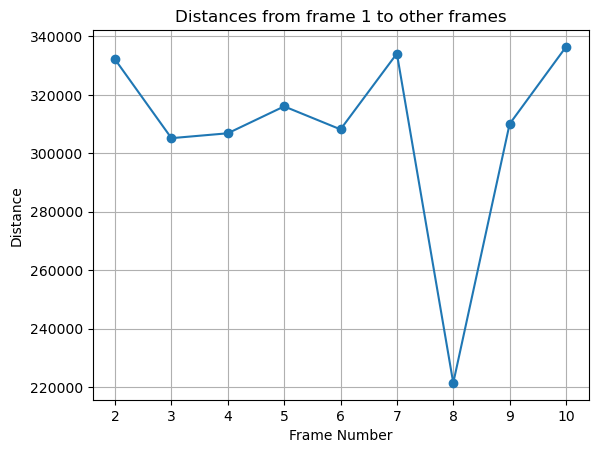

In [20]:
frame_numbers = list(range(2, len(distances) + 2))  # Frame numbers for x-axis

plt.plot(frame_numbers, distances, marker='o')
plt.xlabel('Frame Number')
plt.ylabel('Distance')
plt.title('Distances from frame 1 to other frames')
plt.grid(True)
plt.show()


In [ ]:
#now take distance from 7-8, 7-9
#Un-selected frames sent to the NN - to classification